In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
File = "historical_automobile_sales.csv"
df = pd.read_csv(File)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [6]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [7]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [8]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

Text(0, 0.5, 'Number of Automobiles')

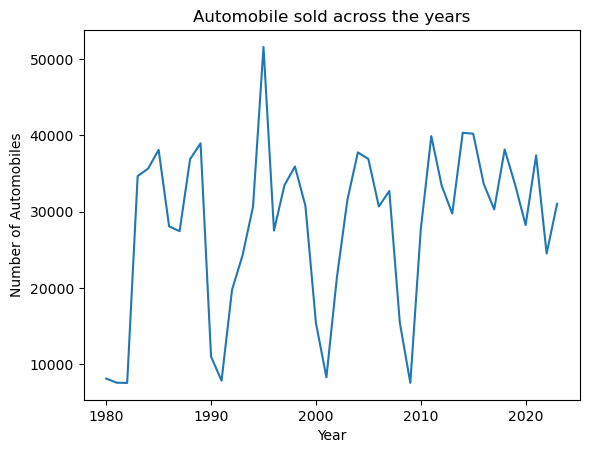

In [9]:
temp = df.groupby("Year")["Automobile_Sales"].sum()
temp.plot(x="Year", y="Automobile_Sales", kind="line")
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")

Text(0, 0.5, 'Number of Automobiles')

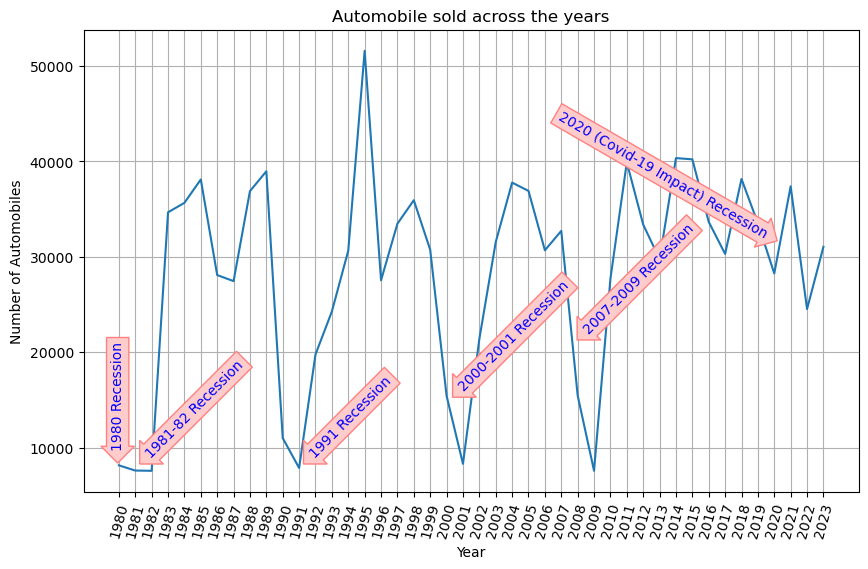

In [10]:
plt.figure(figsize=(10, 6))
temp.plot(x="Year", y="Automobile_Sales", kind="line")
plt.xticks(list(range(df.Year.unique().min(), df.Year.unique().max()+1)), rotation=75)
years = [1979.5, 1981.5, 1991.5, 2000.6, 2008.2, 2006.7]
texts = ["1980 Recession", 
         "1981-82 Recession", 
         "1991 Recession", 
         "2000-2001 Recession", 
         "2007-2009 Recession", 
         "2020 (Covid-19 Impact) Recession"]
positions = [(i+1)*(10**4) for i in range(len(years))]
positions = [10000, 9000, 9000, 16000, 22000, 32000]
for year, text, pos in zip(years, texts, positions):
    if year==1979.5:
        plt.text(year, pos, text, rotation=90, color="blue",
             bbox=dict(boxstyle="larrow",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8)
                      )
            )
        continue
    if year==2006.7:
        plt.text(year, pos, text, rotation=-30, color="blue",
             bbox=dict(boxstyle="rarrow",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8)
                      )
            )
        continue
    plt.text(year, pos, text, rotation=45, color="blue",
             bbox=dict(boxstyle="larrow",
                       ec=(1., 0.5, 0.5),
                       fc=(1., 0.8, 0.8)
                      )
            )
plt.grid()
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")

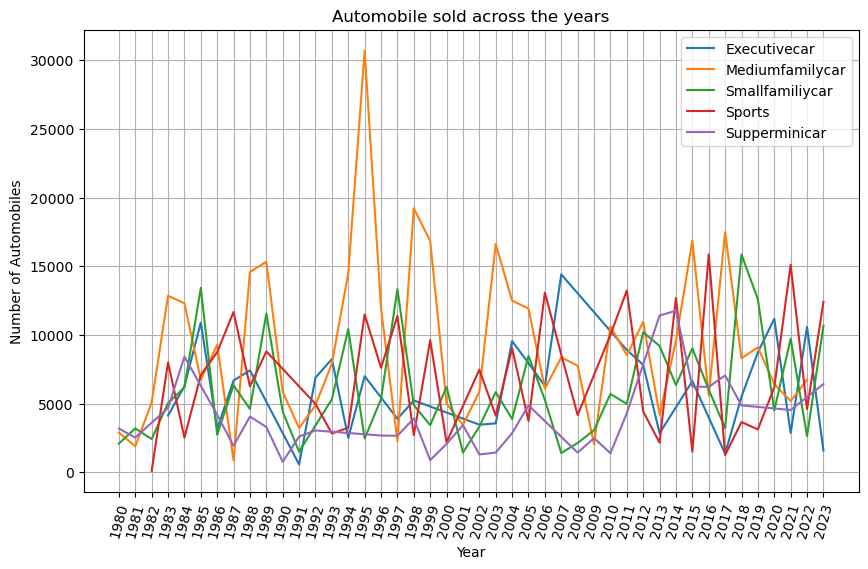

In [11]:
plt.figure(figsize=(10, 6))
temp = df.groupby(["Year", "Vehicle_Type"])[["Automobile_Sales"]].sum().reset_index()
temp.set_index("Year", inplace=True)
temp = temp.groupby(["Vehicle_Type"])["Automobile_Sales"]
temp.plot(kind="line")
plt.xticks(list(range(df.Year.unique().min(), df.Year.unique().max()+1)), rotation=75)
plt.grid()
plt.title("Automobile sold across the years")
plt.xlabel("Year")
plt.ylabel("Number of Automobiles")
plt.legend()

Text(0.5, 1.0, 'Average Automobile Sales during Recession and Non-Recession')

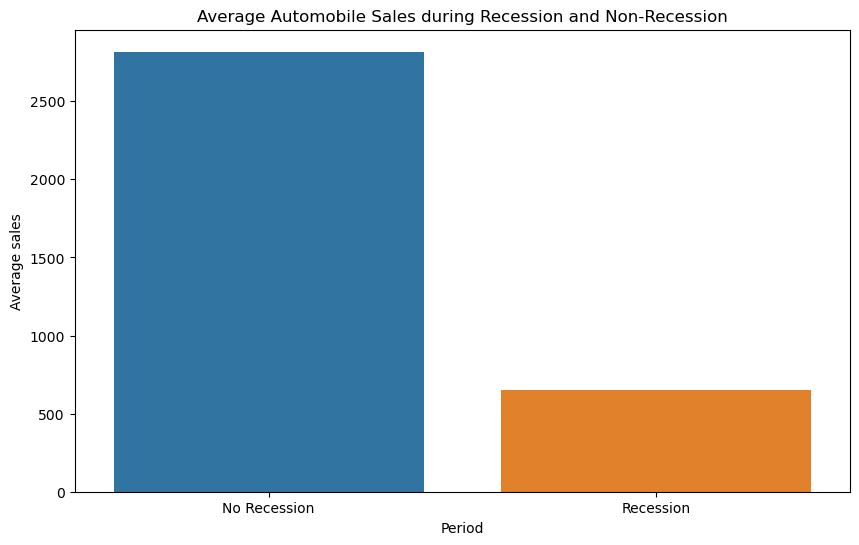

In [12]:
temp=df.groupby(["Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0:"No Recession", 1:"Recession"})
# temp
plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x="Recession", y="Automobile_Sales")
plt.xlabel('Period')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')

Text(0.5, 1.0, 'Average Automobile Sales per Vehicle Type during Recession and Non-Recession')

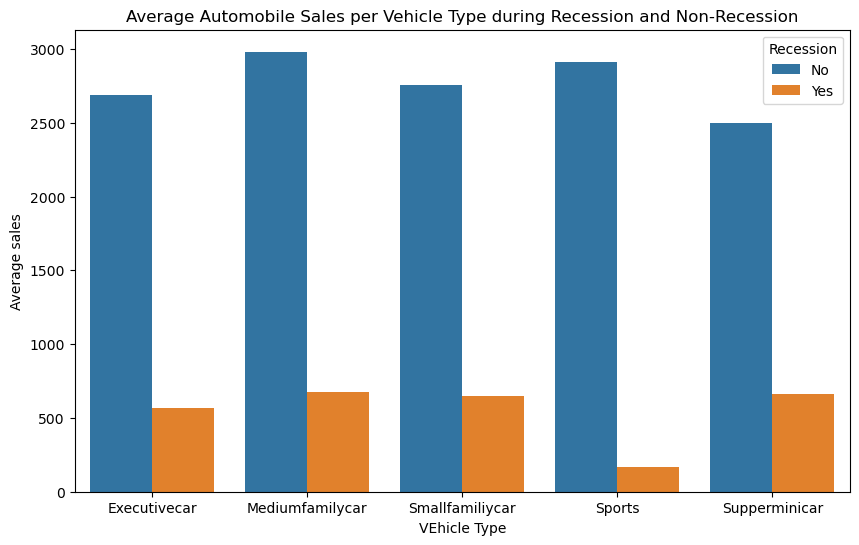

In [13]:
temp=df.groupby(["Vehicle_Type", "Recession"])["Automobile_Sales"].mean().reset_index()
temp["Recession"] = temp["Recession"].replace({0:"No", 1:"Yes"})
plt.figure(figsize=(10, 6))
sns.barplot(data=temp, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")
plt.xlabel('VEhicle Type')
plt.ylabel('Average sales')
plt.title('Average Automobile Sales per Vehicle Type during Recession and Non-Recession')

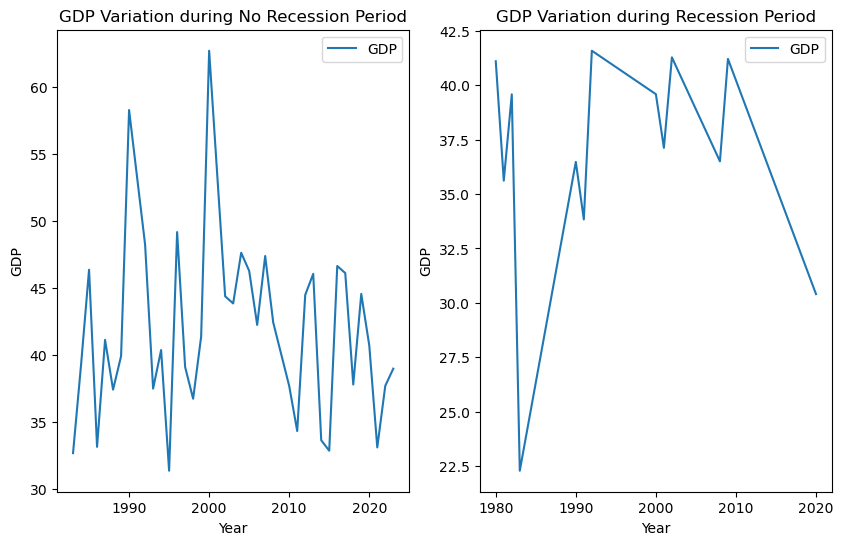

In [14]:
temp = df.groupby(["Recession","Year"])["GDP"].mean().reset_index()
no = temp[temp["Recession"] == 0]
yes = temp[temp["Recession"] == 1]

fig = plt.figure(figsize=(10, 6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

no.plot(x="Year", y="GDP", kind="line", ax=ax0)
ax0.set_title('GDP Variation during No Recession Period')
ax0.set_ylabel('GDP')

yes.plot(x="Year", y="GDP", kind="line", ax=ax1)
ax1.set_title('GDP Variation during Recession Period')
ax1.set_ylabel('GDP')

plt.show()

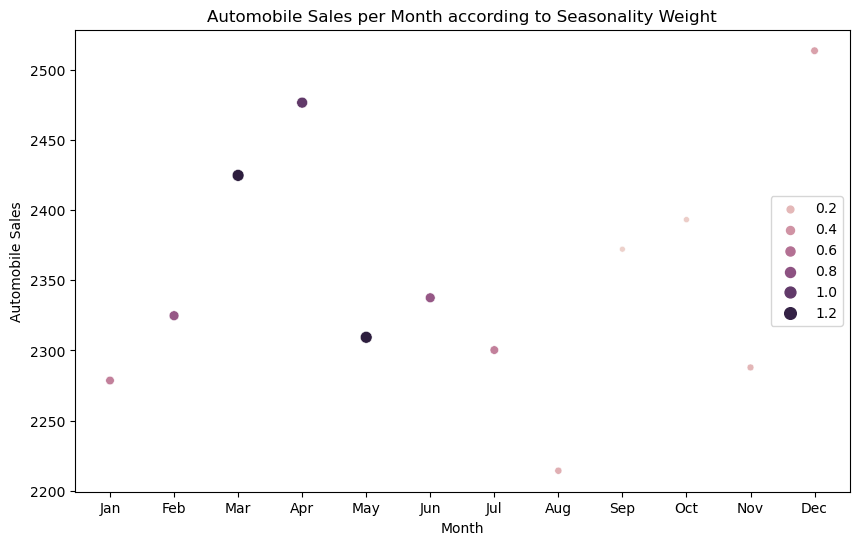

In [15]:
temp = df.copy()
months=temp["Month"].unique().tolist()
# display(months)
temp["Month"] = temp["Month"].replace(dict(zip(months, range(0,len(months)))))
temp = temp.groupby("Month")[["Automobile_Sales", "Seasonality_Weight"]].mean().reset_index()
# display(temp)
plt.figure(figsize=(10, 6))
plt.xticks(ticks=range(0,len(months)),labels=months)
sns.scatterplot(data=temp,
                x='Month',
                y='Automobile_Sales',
                hue="Seasonality_Weight",
                size="Seasonality_Weight",  # pass in weights 
                #sizes=(20, 1500)
               )
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.title("Automobile Sales per Month according to Seasonality Weight")
plt.legend(loc="right")

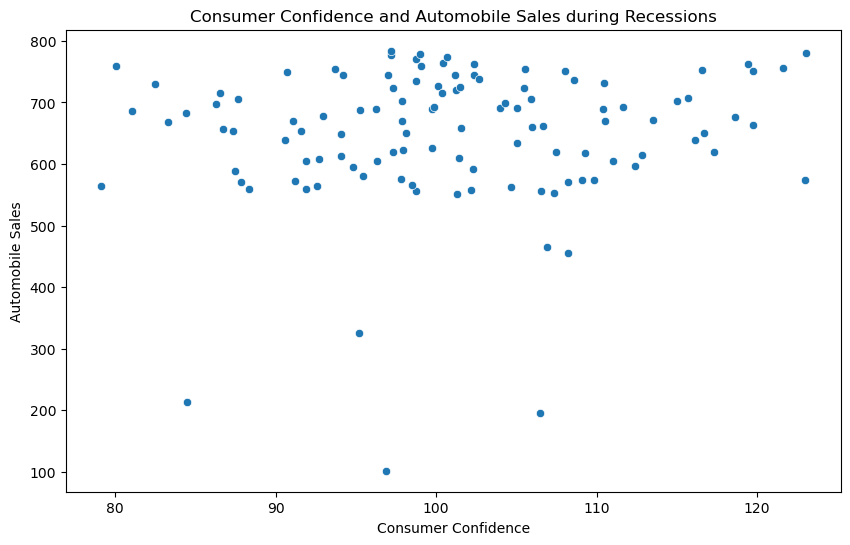

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df["Recession"]==1], x='Consumer_Confidence', y='Automobile_Sales')
plt.title("Consumer Confidence and Automobile Sales during Recessions")
plt.xlabel("Consumer Confidence")
plt.ylabel("Automobile Sales")
plt.show()

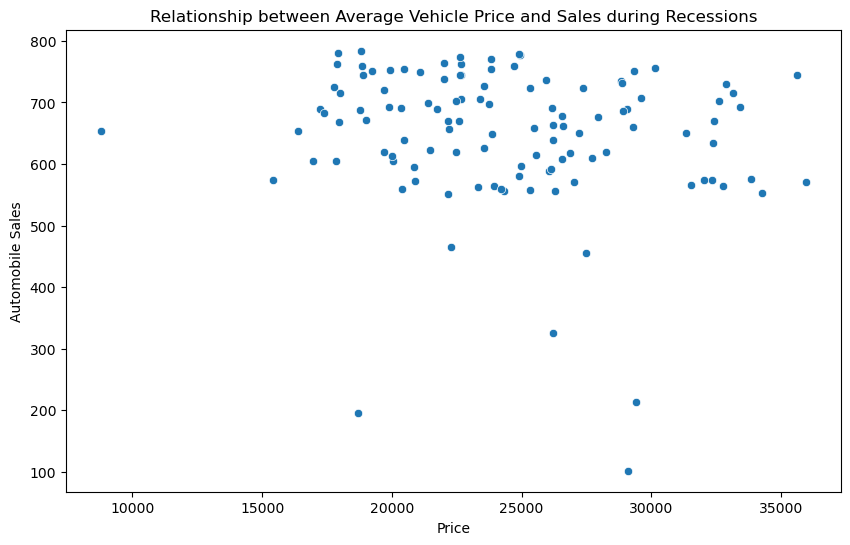

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df["Recession"]==1], x='Price', y='Automobile_Sales')
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")
plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.show()

No Recession    0.790129
Recession       0.209871
Name: Advertising_Expenditure, dtype: float64

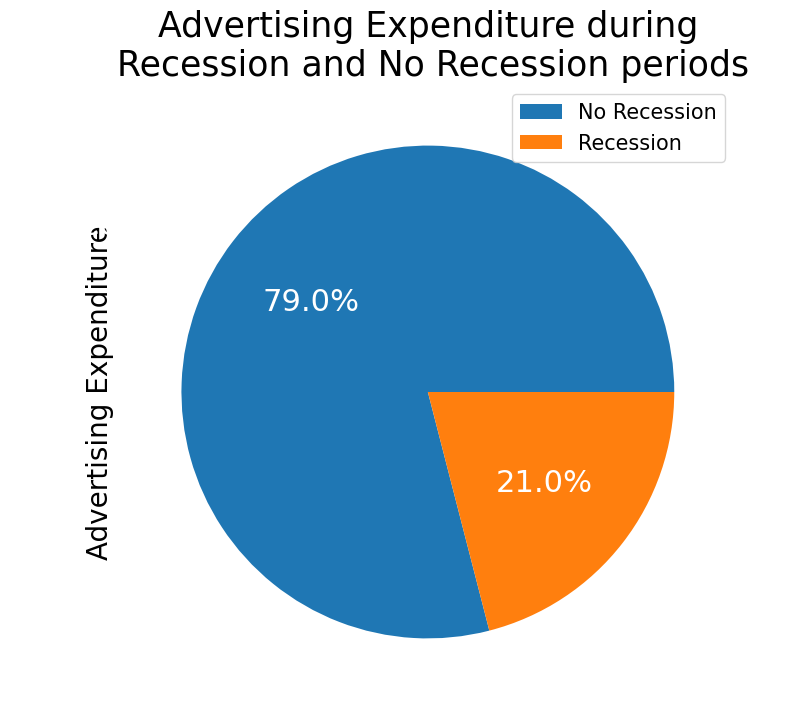

In [18]:
temp=df.groupby("Recession")["Advertising_Expenditure"].sum()/df["Advertising_Expenditure"].sum()
temp.index=["No Recession", "Recession"]
display(temp)
temp.plot(kind="pie",
          figsize=(12, 8),
          y="Advertising_Expenditure",
          #ylabel=dict(ylabel="Advertising Expenditure",fontsize=100),
          x="Recession",
          #title="HOLA",
          autopct='%1.1f%%',
          textprops={'color':"w", "size":22},
         )
plt.ylabel(ylabel="Advertising Expenditure",fontsize=20)
plt.title(label="Advertising Expenditure during\n Recession and No Recession periods",fontsize=25)
plt.legend(fontsize=15)
plt.show()

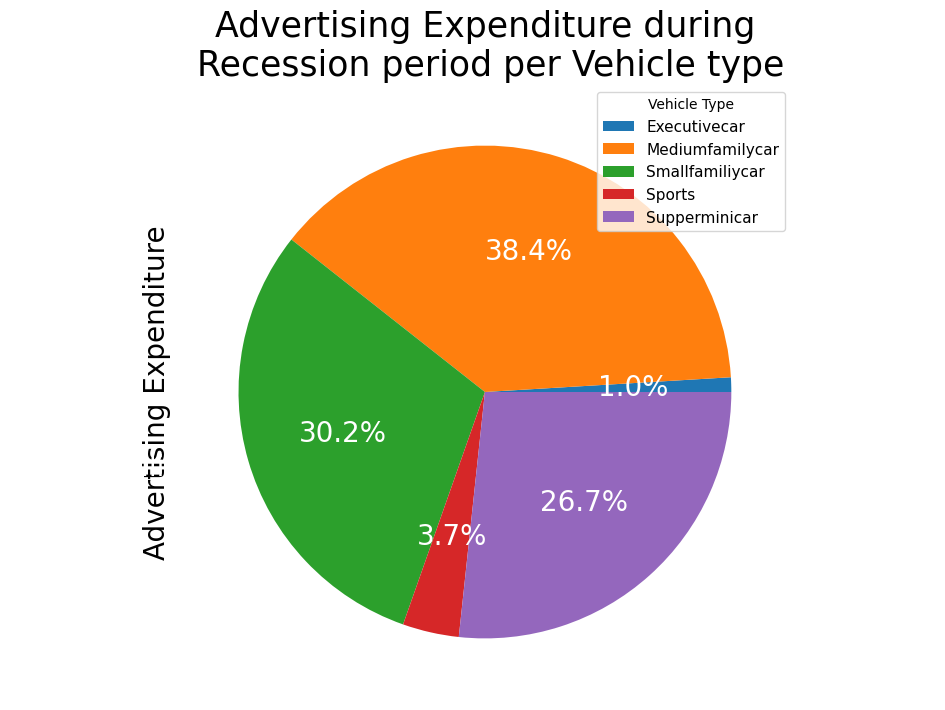

In [19]:
temp=df[df["Recession"]==1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
temp.plot(kind="pie",
          figsize=(12, 8),
          autopct='%1.1f%%',
          y="Advertising_Expenditure",
          textprops={'color':"w", "size":20},
         )
plt.ylabel(ylabel="Advertising Expenditure",fontsize=20)
plt.title(label="Advertising Expenditure during\n Recession period per Vehicle type",fontsize=25)
plt.legend(title="Vehicle Type", loc="best", fontsize=11)
plt.show()

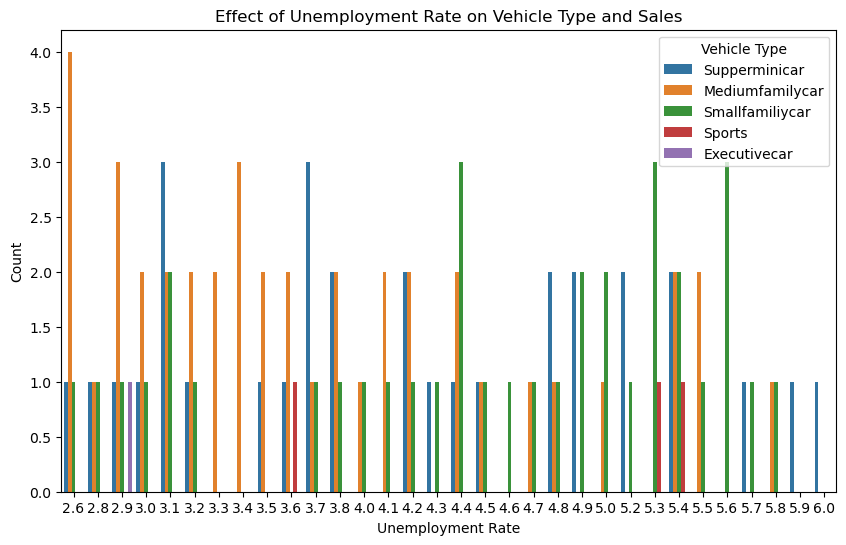

In [20]:
#df.columns
plt.figure(figsize=(10,6))
sns.countplot(data=df[df["Recession"]==1], x="unemployment_rate", hue="Vehicle_Type")
plt.xlabel("Unemployment Rate")
plt.ylabel("Count")
plt.title("Effect of Unemployment Rate on Vehicle Type and Sales")
plt.legend(loc="upper right", title="Vehicle Type")